# CHAPTER 4 모델 훈련
* Data -> 변수 1개, x -> y
* 연속형 데이터
    - 값을 예측

* 분류형(범주) 데이터
    - class를 분류

## 선형회귀 모델
* 선에서 벗어난 오차를 '입십론($\epsilon$)'이라 부름
    - f(Xn) + 입실론 = Yn
    - 에측            실제값
* 각각의 '입실론'을 최소화시키는게 선형 회귀 모델임
    - $ f(X) = \beta0 + \beta1X + \epsilon(범위) $
        + predict=$\beta0+\beta1X$
    - 오차 : 우리가 인정할 수 있어야 한다.
        + \epsilon_i$의 분포가 정규분포 안쪽 -> 인정 가능
    - 정규 분포는 : E(입실론i) = 0
    
### Cost function
* $\displaystyle \sum_{i=1}^n (Y_i-\widehat{Y_i})^2$
* Cost function이 최소화 되는 값을 찾는게 목표!
* root 금지 - 미분이 어렵게 됨
* 거리의 방향을 제거한
* 예)
    - 범위 : 1 ~ 6
    - predict function : 2
    - cost : (1-2)^2 + (6-1)^2 = 17
    - predict function : 3
    - cost : (1-3)^2 + (6-3)^2 = 13
    - predict function : 4
    - cost : (1-4)^2 + (6-4)^2 = 13
    - 그래프는 곡선($\cup$)일 것이다.
        + 그래프의 최하단이 cost값을 최소화 한다.
        
* $f(\beta_{0},\beta_{1})$
    + 변수 $\beta_{0}, \beta_{1}$

* $\beta$가 2개면 그래프가 입체적으로 변함 곡선뿔(아래로 볼록?)같은 형태

### 미분
* 기울기 0을 찾을 때 사용 가능
    - __기울기가 0이 cost값이 최소__
    
* $\beta$가 1개
    - 그냥 '미분'함
    - $\beta_0$에 대해 미분

* $\beta$가 2개
    - 다변량 '미분'함
    - $\beta_{0}, ..., \beta_{1}$에 대해 미분

#### 미분
* __접하는 선(line)의 기울기__
    - 순간 속력(순간 변화량)
* 이동거리 : 2km -> 3시간
* 평균속력 : 2/3 -> km/시간
    - 평균속력 : 거리의 변화량 / 시간의 변화량 = __기울기__

$\displaystyle \lim_{\vartriangle t \to 0}  {f(t) - f(t+\vartriangle t) \over \vartriangle{t}}$ : 순간 속력

* __기울기 = 0 => 미분 = 0__

## Cost function의 미분
### 1) $\beta$가 1개
* $cost'(\beta_{0})$, ${d \over d\beta_{0}} cost(\beta_{0})$
* ${d \over d\beta_{0}} cost(\beta_{0})$ = $0 -2Y_i +2\beta_0$
    - $\beta_0$ = $\sum Y_i$
    
### 2) $\beta$가 2개 (편미분, 다변수 미분)
* 이미지 참조 : 1.pdf

* $\partial$(파셜)
    - $\partial cost(\beta_{0},\beta_{1}) \over \partial \beta_{0} = 0$
    - $\partial cost(\beta_{0},\beta_{1}) \over \partial \beta_{1} = 0$
    
* 변수 2개 식 2개 => 연립 방정식
    - 이미지 참조 : 1.pdf
    
* 변수 3개, 미분 3번, $\beta_0, \beta_1, \beta_2$ => 연립방정식
    - $\beta_0 + \beta_1 X_1 + \beta_2 X_2$
    
### 다변량 '미분'이 '일반화'되면?
* __정규방정식__이 나타난다.
* 정규방정식의 표기법?
    - 이미지 참조

### cost function
* 정규방적식 사용은 컴퓨터에게 부담이 된다.
    - => $ \sum_{i=1}^n (XB-y)^2$ '미분'하면 => 0
    - $0 - 2X^T(XB-y)$
    - ...
    - $B = (X^TX)^{-1} X^Ty$ : 정규 방정식


In [3]:
# 선형회귀
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

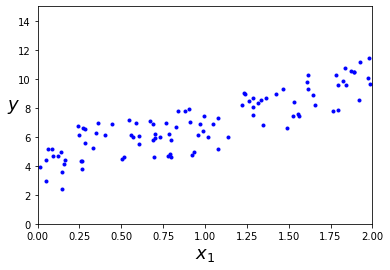

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## 정규 방정식
* 선형회귀 풀이 1번째

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [16]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best  # 절편, 기울기

array([[4.14609228],
       [2.92292157]])

In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.14609228],
       [9.99193541]])

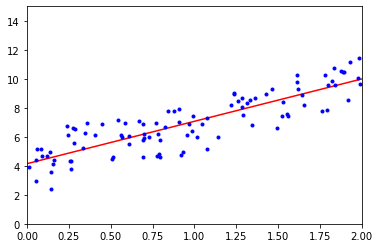

In [14]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.14609228]), array([[2.92292157]]))

In [15]:
lin_reg.predict(X_new)

array([[4.14609228],
       [9.99193541]])

### 유사역행렬
* 책 참고 : p163

## 경사 하강법
* 선형회귀 풀이 2번째
* Cost functinon => cost($\beta$)
    - 목적 : $cost'(\beta) = 0 인 \beta을 찾는것$
    - 방법 1 : $\beta \in R^n$에 대해 무차별 대입
    - 방법 2 : 적당한 규칙을 적용 => 순차적으로 업데이트 => 결과
        + 적당한 규칙 : 이미지 참조(1.pdf)
        + 기울기가 0이 될 때까지 반복 => B = B - n*0 = B
        
* 정규방적식 풀이는 컴퓨터에게 엄청난 부담을 준다.
* 에타($\eta$) : 학습률(Learning rate), 사용자가 정하는 값, 하이퍼파라미터
* 베타($\beta$) : 구할려는값(기울기, 절편)

## 배치 경사 하강법의 종류
* BATCH(배치) 사이즈를 기준으로 종류를 나눔
1. 많은 피처(Feature, 특성)를 몽땅 학습시키면
    - 문제 : 오래거림, 메모리 부족
2. 데이터를 나눠서 여러번의 학습 과정

1. epoch, step, batch size
    - epoch : 전체 샘플(Sample) 한 바퀴 돌면, 1 epoch
    - step : 기울기(가중치, Weight),  편향(절편, Bias) 1회 업데이트, 1 setp
    - batch size : 1 step에서 사용한 데이터의 수
        + 몇 개를 학습 시킬지 정함

**식 4-6: 비용 함수의 그레이디언트 벡터**

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

**식 4-7: 경사 하강법의 스텝**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$


## GD(Gradient descent,경사 하강법)
* Full Batch GD
* Batch size = m = 전체 데이터
* matrix 연산
    - m번 계산후 업데이트

## SGD(Stochastic Gradient Descent, 확률적 경사 하강법)
* batch size = m = 1 (랜덤으로 추출된 1개의 데이터를 사용하여 업데이트)
* 벡터단위 연산
    - 장점 : 업데이트가 빠르다. (1번 계산으로 업데이트)
    - 단점 : 행렬 연산의 장점이 사라진다.
    
## Mini Batch GD
* batch size = m = 사용자가 지정 $2^n$로 지정
    - 장점 : matrix 연산 사용
    - 단점 : SGD보다 느리다.

In [19]:
# GD(Gradient descent,경사 하강법)
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [20]:
theta

array([[4.14609228],
       [2.92292157]])

In [38]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

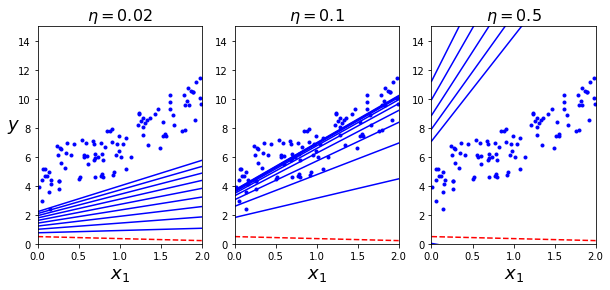

In [39]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

In [22]:
# 확률적 경사 하강법
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

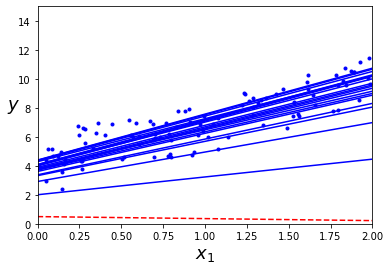

In [23]:
# 확률적 경사 하강법
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 없음
            y_predict = X_new_b.dot(theta)           # 책에는 없음
            style = "b-" if i > 0 else "r--"         # 책에는 없음
            plt.plot(X_new, y_predict, style)        # 책에는 없음
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 없음

plt.plot(X, y, "b.")                                 # 책에는 없음
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 없음
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 없음
plt.axis([0, 2, 0, 15])                              # 책에는 없음
plt.show()                                           # 책에는 없음

In [24]:
theta

array([[4.12126411],
       [2.86741336]])

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
# 에포크 : 1000, 학습률 : 0.1

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [26]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.15222941]), array([2.93106716]))

In [27]:
#
# 미니배치 경사 하강법
# 

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [28]:
theta

array([[4.13258672],
       [2.91227028]])

In [40]:
#
# 3개 비교
#
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

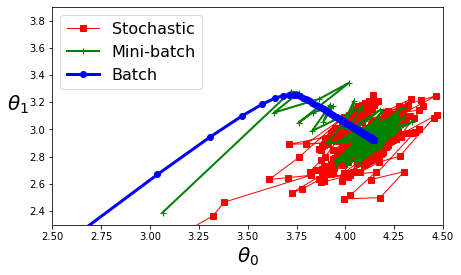

In [41]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

In [ ]:
## Cost function
* 입력한 Training Set에 대하여 가장 적합한 직선을 우리가 가질 수 있게 해줌 = 목표
* Cost = (h - y)^2
    - Cost = 예측된 결과 값(h) - 실제 결과 값(y)
    - 음수로 값이 없어지면 안되기 때문에 제곱함

# 개인 정리
1. 선형 회귀에서 미분을 사용하는 이유?
  - __Cost function__의 최소값을 구하기 위해서
  - 미분을 사용하면 기울기 0을 구할 수 있어서, 기울기 0이 최소값
2. 미분이 순간속력을 구하는 거고, 미분은 방향(-/+)을 가지고 있는게 맞나요?
  - 미분 : 순간적인 변화
  - yes
3. 구하는 $\beta$는 '기울기'와 '절편'을 뜻하는가?
  - yes
4. cost function이 MSE와 같다고 할수 있나요?
  - MSE 는 Cost Function의 한 종류 입니다